In [3]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
import random
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [4]:
!gdown --id 1oVadTMOUYnCl-IbLd5HgmnrSkRIdPgTB

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1oVadTMOUYnCl-IbLd5HgmnrSkRIdPgTB
To: /content/heart_2020_cleaned.csv
100% 25.2M/25.2M [00:00<00:00, 84.9MB/s]


In [5]:
# from google.colab import files
# files.upload()

In [6]:
df=pd.read_csv("heart_2020_cleaned.csv")

In [7]:
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


In [8]:
# !pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

In [9]:
# pip install pandas-profiling

In [10]:
# from pandas_profiling import ProfileReport
# prof = ProfileReport(df)
# report.to_noteboo_iframe()
# prof.to_file(output_file='output.html')

# find null value

In [11]:
# df.isnull().sum()

In [12]:
# df.describe()

# use median for age column

In [13]:
df.AgeCategory

0               55-59
1         80 or older
2               65-69
3               75-79
4               40-44
             ...     
319790          60-64
319791          35-39
319792          45-49
319793          25-29
319794    80 or older
Name: AgeCategory, Length: 319795, dtype: object

In [14]:
res = [sub.replace('80 or older', '80-100') for sub in df.AgeCategory]

In [15]:
first_part = []
second_part = []
for ele in res:
    first_part.append(ele.split("-")[0])
    second_part.append(ele.split("-")[1])

In [16]:
f1_age = list(map(int, first_part))
f2_age=list(map(int, second_part))

In [17]:
median=[]
for i in range(len(f1_age)):
  l=(f1_age[i]+f2_age[i])/2
  median.append(l)

In [18]:
median = list(map(int, median))

In [19]:
df["AgeCategory"]=median

In [20]:
df["AgeCategory"]

0         57
1         90
2         67
3         77
4         42
          ..
319790    62
319791    37
319792    47
319793    27
319794    90
Name: AgeCategory, Length: 319795, dtype: int64

# data preprocessing

In [21]:
df.Diabetic.unique()

array(['Yes', 'No', 'No, borderline diabetes', 'Yes (during pregnancy)'],
      dtype=object)

In [22]:
df.Asthma.value_counts()

No     276923
Yes     42872
Name: Asthma, dtype: int64

In [23]:
df.KidneyDisease.value_counts()

No     308016
Yes     11779
Name: KidneyDisease, dtype: int64

In [24]:
df.SkinCancer.value_counts()

No     289976
Yes     29819
Name: SkinCancer, dtype: int64

# feature importance

In [25]:
# import seaborn as sns
# sns.heatmap(train_x, train_y)

In [26]:
# X,y=df.load_wine(return_X_y=True)
# k = 4 tells four top features to be selected
# Score function Chi2 tells the feature to be selected using Chi Square
# test = SelectKBest(score_func=chi2, k=4)
# fit = test.fit(train_x, train_y)
# fit.scores_

In [27]:
df.AgeCategory.max()

90

In [28]:
df.AgeCategory.min()

21

# split odenial and nominal data

In [29]:
num = df[['BMI','PhysicalHealth', 'MentalHealth', 'SleepTime', 'AgeCategory']]
cat = df.drop(num, axis = 1)

In [30]:
cat

,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
0,No,Yes,No,No,No,Female,White,Yes,Yes,Very good,Yes,No,Yes
1,No,No,No,Yes,No,Female,White,No,Yes,Very good,No,No,No
2,No,Yes,No,No,No,Male,White,Yes,Yes,Fair,Yes,No,No
3,No,No,No,No,No,Female,White,No,No,Good,No,No,Yes
4,No,No,No,No,Yes,Female,White,No,Yes,Very good,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,Yes,No,No,Yes,Male,Hispanic,Yes,No,Fair,Yes,No,No
319791,No,Yes,No,No,No,Male,Hispanic,No,Yes,Very good,Yes,No,No
319792,No,No,No,No,No,Female,Hispanic,No,Yes,Good,No,No,No
319793,No,No,No,No,No,Female,Hispanic,No,No,Good,No,No,No


# lavel encoding

In [31]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

categ = cat.columns
cat[categ] = cat[categ].apply(le.fit_transform)

In [32]:
cat

,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
0,0,1,0,0,0,0,5,2,1,4,1,0,1
1,0,0,0,1,0,0,5,0,1,4,0,0,0
2,0,1,0,0,0,1,5,2,1,1,1,0,0
3,0,0,0,0,0,0,5,0,0,2,0,0,1
4,0,0,0,0,1,0,5,0,1,4,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,1,0,0,1,1,3,2,0,1,1,0,0
319791,0,1,0,0,0,1,3,0,1,4,1,0,0
319792,0,0,0,0,0,0,3,0,1,2,0,0,0
319793,0,0,0,0,0,0,3,0,0,2,0,0,0


In [33]:
cat.Diabetic.value_counts()

0    269653
2     40802
1      6781
3      2559
Name: Diabetic, dtype: int64

In [34]:
# drop_clumn=cat[["Race","Diabetic","GenHealth"]]
# catagorical_column=cat.drop(drop_clumn, axis = 1)
cat.drop(['GenHealth'], axis=1,inplace= True)

In [35]:
cat

,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,Race,Diabetic,PhysicalActivity,Asthma,KidneyDisease,SkinCancer
0,0,1,0,0,0,0,5,2,1,1,0,1
1,0,0,0,1,0,0,5,0,1,0,0,0
2,0,1,0,0,0,1,5,2,1,1,0,0
3,0,0,0,0,0,0,5,0,0,0,0,1
4,0,0,0,0,1,0,5,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,1,0,0,1,1,3,2,0,1,0,0
319791,0,1,0,0,0,1,3,0,1,1,0,0
319792,0,0,0,0,0,0,3,0,1,0,0,0
319793,0,0,0,0,0,0,3,0,0,0,0,0


In [36]:
df.GenHealth.value_counts() 

Very good    113858
Good          93129
Excellent     66842
Fair          34677
Poor          11289
Name: GenHealth, dtype: int64

# level encoding in GenHealth column

In [37]:
GenHealth=df.GenHealth

In [38]:
levle_data={"Excellent":4,"Very good":3,"Good":2,"Fair":1,"Poor":0}
def level_encoding(data,levle_data):
  k=[]
  # df["level_diagnosis"]+k
  for x in range(len(data)):
    str_data=levle_data[data[x]]
    k.append(str_data)
  return k

GenHealth=level_encoding(GenHealth,levle_data)

In [39]:
cat["GenHealth"]=GenHealth
cat

,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,Race,Diabetic,PhysicalActivity,Asthma,KidneyDisease,SkinCancer,GenHealth
0,0,1,0,0,0,0,5,2,1,1,0,1,3
1,0,0,0,1,0,0,5,0,1,0,0,0,3
2,0,1,0,0,0,1,5,2,1,1,0,0,1
3,0,0,0,0,0,0,5,0,0,0,0,1,2
4,0,0,0,0,1,0,5,0,1,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,1,0,0,1,1,3,2,0,1,0,0,1
319791,0,1,0,0,0,1,3,0,1,1,0,0,3
319792,0,0,0,0,0,0,3,0,1,0,0,0,2
319793,0,0,0,0,0,0,3,0,0,0,0,0,2


# level encoding in Diabetic column

In [40]:
# Diabetic=df.Diabetic

In [41]:
# levle_data={"Yes":3,"Yes (during pregnancy)":2,"No, borderline diabetes":1,"No":0}
# def level_encoding(data,levle_data):
#   k=[]
#   # df["level_diagnosis"]+k
#   for x in range(len(data)):
#     str_data=levle_data[data[x]]
#     k.append(str_data)
#   return k

# Diabetic=level_encoding(Diabetic,levle_data)

In [42]:
# cat["Diabetic"]=Diabetic
# cat

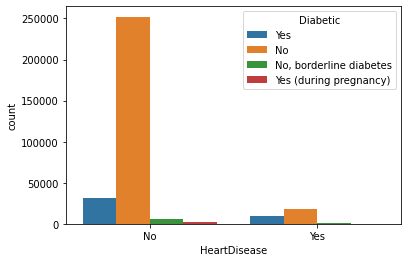

In [43]:
sns.countplot(x=df.HeartDisease,hue=df.Diabetic)

In [44]:
df.HeartDisease.value_counts()

No     292422
Yes     27373
Name: HeartDisease, dtype: int64

In [45]:
df.Diabetic.value_counts()

No                         269653
Yes                         40802
No, borderline diabetes      6781
Yes (during pregnancy)       2559
Name: Diabetic, dtype: int64

In [46]:
result = pd.concat([num, cat], axis=1, join='inner')

In [47]:
result

,BMI,PhysicalHealth,MentalHealth,SleepTime,AgeCategory,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,Race,Diabetic,PhysicalActivity,Asthma,KidneyDisease,SkinCancer,GenHealth
0,16.60,3.0,30.0,5.0,57,0,1,0,0,0,0,5,2,1,1,0,1,3
1,20.34,0.0,0.0,7.0,90,0,0,0,1,0,0,5,0,1,0,0,0,3
2,26.58,20.0,30.0,8.0,67,0,1,0,0,0,1,5,2,1,1,0,0,1
3,24.21,0.0,0.0,6.0,77,0,0,0,0,0,0,5,0,0,0,0,1,2
4,23.71,28.0,0.0,8.0,42,0,0,0,0,1,0,5,0,1,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,27.41,7.0,0.0,6.0,62,1,1,0,0,1,1,3,2,0,1,0,0,1
319791,29.84,0.0,0.0,5.0,37,0,1,0,0,0,1,3,0,1,1,0,0,3
319792,24.24,0.0,0.0,6.0,47,0,0,0,0,0,0,3,0,1,0,0,0,2
319793,32.81,0.0,0.0,12.0,27,0,0,0,0,0,0,3,0,0,0,0,0,2


In [48]:
x_data=result.iloc[:,0:].drop(['HeartDisease'], axis = 1)
y_data=result.HeartDisease

In [49]:
# X,y=df.load_wine(return_X_y=True)
# k = 4 tells four top features to be selected
# Score function Chi2 tells the feature to be selected using Chi Square
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(x_data, y_data)
fit.scores_

array([1.22402073e+03, 1.74751530e+05, 4.24369101e+03, 6.44235094e+00,
       1.16552662e+05, 2.18195302e+03, 3.06693270e+02, 1.19225776e+04,
       1.11544149e+04, 8.23195671e+02, 1.29834374e+02, 1.55264064e+04,
       7.18810142e+02, 4.75647835e+02, 6.49365414e+03, 2.52512251e+03,
       7.92671203e+03])

In [50]:
column=x_data.columns
column

Index(['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime', 'AgeCategory',
       'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'Race',
       'Diabetic', 'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer',
       'GenHealth'],
      dtype='object')

In [51]:
for i in range(len(fit.scores_)):
  print(column[i],"  ==",fit.scores_[i])

BMI   == 1224.0207257225218
PhysicalHealth   == 174751.52992377843
MentalHealth   == 4243.691008175619
SleepTime   == 6.442350936508308
AgeCategory   == 116552.66182378223
Smoking   == 2181.9530231031317
AlcoholDrinking   == 306.69327027017357
Stroke   == 11922.577647178325
DiffWalking   == 11154.414930638695
Sex   == 823.1956712923966
Race   == 129.83437437544376
Diabetic   == 15526.406398793944
PhysicalActivity   == 718.810142010766
Asthma   == 475.64783537825235
KidneyDisease   == 6493.654142687115
SkinCancer   == 2525.122509296585
GenHealth   == 7926.712026364055


# train test split

In [52]:
df.drop(["Race","SleepTime"], axis = 1,inplace=True)

In [53]:
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,57,Yes,Yes,Very good,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,90,No,Yes,Very good,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,67,Yes,Yes,Fair,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,77,No,No,Good,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,42,No,Yes,Very good,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,62,Yes,No,Fair,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,37,No,Yes,Very good,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,47,No,Yes,Good,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,27,No,No,Good,No,No,No


In [54]:
x=df.iloc[:,0:].drop(['HeartDisease'], axis = 1)
y=df.HeartDisease

In [55]:
# def train_test_split(x,y,test_size):
#   #isinstance check it is float number or not
#   if isinstance (test_size,float):
#     test_size=round(test*len(df))
#   indices_x=list(x.index)
#   indices_y=list(y.index)
#   #random.sample Lift up random number in data set
#   train_indices_x=random.sample(indices_x,test_size)
#   train_indices_y=random.sample(indices_y,test_size)
#   test_x=x.iloc[train_indices_x]
#   test_y=y.iloc[train_indices_y]
#   train_x=x.drop(train_indices_x)
#   train_y=y.drop(train_indices_y)
#   return train_x,train_y,test_x,test_y

train_x,test_x,train_y,test_y=train_test_split(x_data,y_data,test_size=0.2)

In [56]:
train_x

,BMI,PhysicalHealth,MentalHealth,SleepTime,AgeCategory,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,Race,Diabetic,PhysicalActivity,Asthma,KidneyDisease,SkinCancer,GenHealth
181129,34.95,0.0,0.0,7.0,47,0,0,0,0,0,5,0,1,0,0,0,3
9918,25.82,8.0,0.0,6.0,90,0,0,1,1,0,5,0,0,1,1,0,0
193521,31.62,0.0,0.0,8.0,57,1,1,0,0,0,5,0,1,0,0,0,3
53471,22.86,0.0,0.0,9.0,62,0,0,0,0,1,5,0,1,0,0,0,4
148960,29.57,30.0,0.0,8.0,77,0,0,0,1,0,5,2,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34914,34.08,15.0,15.0,7.0,32,1,0,0,0,1,5,0,1,0,0,0,1
45192,38.97,0.0,0.0,6.0,72,1,0,0,0,0,3,0,0,1,0,0,1
55107,20.36,0.0,30.0,7.0,57,0,0,0,0,1,5,0,1,0,0,0,4
315645,21.79,0.0,0.0,7.0,57,1,0,0,0,0,3,0,0,0,0,0,4


In [57]:
test_y

220824    1
252046    0
117761    0
67603     0
37091     0
         ..
242029    0
192879    1
37094     0
35553     0
11002     0
Name: HeartDisease, Length: 63959, dtype: int64

# ML algorithms apply

**desition tree raw code**

In [58]:
# class desition_tree:
#   def __init__(self):
#     self.feature_type=[]
#     self.column_headers=None

#   def check_purity(self,data):      
#     label_column = data[:, -1]
#     unique_classes = np.unique(label_column)

#     if len(unique_classes) == 1:
#         return True
#     else:
#         return False

#   def classify_data(self,data):
      
#       label_column = data[:, -1]
#       unique_classes, counts_unique_classes = np.unique(label_column, return_counts=True)

#       index = counts_unique_classes.argmax()
#       classification = unique_classes[index]
      
#       return classification

#   def get_potential_splits(self,data,randome_subspace):
#     potential_splits = {}
#     _, n_columns = data.shape
#     column_indices=list(range(n_columns-1)) # excluding the last column which is the label
#     if randome_subspace and randome_subspace <= len(column_indices):
#       column_indices=random.sample(column_indices,randome_subspace)#randomle pick number in list
#     for column_index in column_indices: 
#         values = data[:, column_index] #show column one by one
#         unique_values = np.unique(values) #find unique value in column
        
#         potential_splits[column_index] = unique_values
    
#     return potential_splits


#   def split_data(self,data, split_column, split_value):
      
#       split_column_values = data[:, split_column]

#       type_of_feature=self.feature_type[split_column]
#       if type_of_feature == "continuous":
#         data_below = data[split_column_values <= split_value]
#         data_above = data[split_column_values >  split_value]
#       else:
#         data_below = data[split_column_values == split_value]
#         data_above = data[split_column_values !=  split_value]      
      
#       return data_below,data_above


#   def calculate_entropy(self,data):
      
#       label_column = data[:, -1]
#       _, counts = np.unique(label_column, return_counts=True)

#       probabilities = counts / counts.sum()
#       entropy = sum(probabilities * -np.log2(probabilities))
      
#       return entropy

#   def calculate_overall_entropy(self,data_below, data_above):
#       n = len(data_below) + len(data_above)
#       p_data_below = len(data_below) / n
#       p_data_above = len(data_above) / n
#       overall_entropy =  (p_data_below * self.calculate_entropy(data_below) 
#                         + p_data_above * self.calculate_entropy(data_above))
      
#       return overall_entropy


#   def determine_best_split(self,data, potential_splits):
#       overall_entropy = 9999
#       for column_index in potential_splits:
#           for value in potential_splits[column_index]:
#               data_below, data_above = self.split_data(data, split_column=column_index, split_value=value)
#               current_overall_entropy = self.calculate_overall_entropy(data_below, data_above)

#               if current_overall_entropy <= overall_entropy:
#                   overall_entropy = current_overall_entropy
#                   best_split_column = column_index
#                   best_split_value = value
#       return best_split_column, best_split_value


#   def determine_type_of_feature(self,data):
#     # self.feature_type=[]
#     n_unique_values_threshold=15
#     for column in data.columns:
#       unique_values=data[column].unique()#unique value in column 
#       example_value=unique_values[0]#show data in 0 number row
      
#       if (isinstance(example_value,str) or (len(unique_values) <= n_unique_values_threshold)):
#         self.feature_type.append("categorical")
#       else:
#         self.feature_type.append("continuous")

#     return self.feature_type


#   def fit_data(self,df, counter=0,min_samples=2,max_depth=3,randome_subspace=None):
    
#     # data preparations
#     if counter == 0:
#         # self.column_headers ,self.feature_types#its show column name
#         self.column_headers=df.columns
#         self.feature_types=self.determine_type_of_feature(df)
#         data = df.values
#     else:
#         data = df           
    
    
#     # base cases
#     if self.check_purity(data) or (len(data) < min_samples) or (counter == max_depth):
#         classification = self.classify_data(data)
#         return classification

    
#     # recursive part
#     else:    
#         counter += 1

#         # helper functions 
#         potential_splits = self.get_potential_splits(data,randome_subspace)
#         split_column, split_value = self.determine_best_split(data, potential_splits)
#         data_below, data_above = self.split_data(data, split_column, split_value)
        
#         if len(data_below)==0 or len(data_above)==0:
#           classification=self.classify_data(data)
#           return classification

#         # instantiate sub-tree
#         feature_name=self.column_headers[split_column]
#         type_of_feature=self.feature_types[split_column]
#         if type_of_feature == "continuous":
#           question = "{} <= {}".format(feature_name, split_value) #if the column is continuous than it show this type of output
#         else:
#           question = "{} = {}".format(feature_name, split_value) #else show this type of output 
#         sub_tree = {question: []}
        
#         # find answers (recursion)
#         yes_answer = self.fit_data(data_below, counter,min_samples,max_depth,randome_subspace)
#         no_answer = self.fit_data(data_above, counter,min_samples,max_depth,randome_subspace)
        
#         if yes_answer==no_answer:
#           sub_tree=yes_answer
#         else:
#           sub_tree[question].append(yes_answer)
#           sub_tree[question].append(no_answer)
        
#         return sub_tree

In [59]:
# obj=desition_tree()
# tree=obj.fit_data(train_x,max_depth=3)

In [60]:
# tree

In [61]:
# def classify_example(example,tree):
#   question=list(tree.keys())[0] #convert data type dict to list
#   feature_name,comparison_operator,value=question.split() #split data
#   #ask question=Yes

#   if comparison_operator == "<=":
#     if  example[feature_name] <= float(value):
#       answer=tree[question][0]
#     #ask question=No
#     else:
#       answer=tree[question][1]

#   else:
#     if  example[feature_name] == (value):
#       answer=tree[question][0]
#     #ask question=No
#     else:
#       answer=tree[question][1]
#   #base case
#   if not isinstance(answer,dict): #if there is list then its return 
#     return answer
#   else: #if there is dict then its return 
#     residual_tree=answer
#     return classify_example(example,answer)

In [62]:
# def calculate_accuracy(df,tree,target_column):
#   df["classification"]=df.apply(classify_example,axis=1,args=(tree,))
#   df["classification_correct"]=df.classification==target_column

#   accuracy=df.classification_correct.mean()
#   return accuracy

In [63]:
# calculate_accuracy(df,tree,df.HeartDisease)

In [64]:
test_y

220824    1
252046    0
117761    0
67603     0
37091     0
         ..
242029    0
192879    1
37094     0
35553     0
11002     0
Name: HeartDisease, Length: 63959, dtype: int64

In [65]:
# (df.classification==df.HeartDisease).mean()

sklearn desition tree

In [66]:
# from sklearn.tree import DecisionTreeClassifier
# model = DecisionTreeClassifier()
# model.fit(train_x,train_y)

In [67]:
# import pprint
# pprint.pprint(model.fit(train_x,train_y))

In [68]:
# pred_train = model.predict(train_x)
# # Model Evaluation on training data
# from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# # Summary of the predictions made by the classifier
# print(classification_report(train_y,pred_train))
# print(confusion_matrix(train_y,pred_train))

# # Accuracy score
# print('Accuracy Score of Model on train data is: {}' .format(accuracy_score(train_y,pred_train)))

In [69]:
test_x

,BMI,PhysicalHealth,MentalHealth,SleepTime,AgeCategory,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,Race,Diabetic,PhysicalActivity,Asthma,KidneyDisease,SkinCancer,GenHealth
220824,22.46,0.0,0.0,8.0,52,0,0,0,0,0,5,2,1,0,0,0,2
252046,31.38,0.0,0.0,6.0,77,1,0,0,0,1,0,2,0,0,0,0,2
117761,27.32,0.0,0.0,9.0,67,1,0,0,0,1,5,0,1,0,0,0,2
67603,36.90,0.0,0.0,7.0,67,0,0,0,1,0,5,0,1,0,0,0,2
37091,25.09,0.0,0.0,6.0,67,0,0,0,0,1,2,2,1,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242029,48.69,0.0,0.0,8.0,47,0,0,0,0,1,5,0,1,0,0,0,3
192879,32.12,0.0,0.0,6.0,72,0,0,0,0,0,5,1,1,0,0,0,2
37094,27.12,0.0,25.0,7.0,77,0,0,0,0,1,5,0,1,0,0,0,3
35553,23.03,0.0,3.0,5.0,21,1,0,0,0,0,5,0,1,0,0,0,2


In [70]:
test_x.iloc[0]

BMI                 22.46
PhysicalHealth       0.00
MentalHealth         0.00
SleepTime            8.00
AgeCategory         52.00
Smoking              0.00
AlcoholDrinking      0.00
Stroke               0.00
DiffWalking          0.00
Sex                  0.00
Race                 5.00
Diabetic             2.00
PhysicalActivity     1.00
Asthma               0.00
KidneyDisease        0.00
SkinCancer           0.00
GenHealth            2.00
Name: 220824, dtype: float64

In [71]:
# predictions = model.predict([test_x.iloc[0]])
# predictions

In [72]:
# test_y.shape

In [73]:
# (predictions==test_y).mean()

Random_forest

In [74]:
from sklearn.ensemble import RandomForestClassifier

In [75]:
# classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,
#                                        n_estimators=100, oob_score=True)
classifier_rf = RandomForestClassifier()

In [76]:
# classifier_rf.fit(train_x, train_y)

In [77]:
# classifier_rf.oob_score_

In [78]:
# (classifier_rf==test_y).mean()

In [79]:
test_x

,BMI,PhysicalHealth,MentalHealth,SleepTime,AgeCategory,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,Race,Diabetic,PhysicalActivity,Asthma,KidneyDisease,SkinCancer,GenHealth
220824,22.46,0.0,0.0,8.0,52,0,0,0,0,0,5,2,1,0,0,0,2
252046,31.38,0.0,0.0,6.0,77,1,0,0,0,1,0,2,0,0,0,0,2
117761,27.32,0.0,0.0,9.0,67,1,0,0,0,1,5,0,1,0,0,0,2
67603,36.90,0.0,0.0,7.0,67,0,0,0,1,0,5,0,1,0,0,0,2
37091,25.09,0.0,0.0,6.0,67,0,0,0,0,1,2,2,1,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242029,48.69,0.0,0.0,8.0,47,0,0,0,0,1,5,0,1,0,0,0,3
192879,32.12,0.0,0.0,6.0,72,0,0,0,0,0,5,1,1,0,0,0,2
37094,27.12,0.0,25.0,7.0,77,0,0,0,0,1,5,0,1,0,0,0,3
35553,23.03,0.0,3.0,5.0,21,1,0,0,0,0,5,0,1,0,0,0,2


# RandomSearchCV

In [80]:
# Number of trees in random forest
n_estimators = [20,60,100,120]

# Number of features to consider at every split
max_features = [0.2,0.6,1.0]

# Maximum number of levels in tree
max_depth = [2,8,None]

# Number of samples
max_samples = [0.5,0.75,1.0]

# Bootstrap samples
bootstrap = [True,False]

# Minimum number of samples required to split a node
min_samples_split = [2, 5]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]

In [81]:
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
              'max_samples':max_samples,
              'bootstrap':bootstrap,
              'min_samples_split':min_samples_split,
              'min_samples_leaf':min_samples_leaf
             }
print(param_grid)

{'n_estimators': [20, 60, 100, 120], 'max_features': [0.2, 0.6, 1.0], 'max_depth': [2, 8, None], 'max_samples': [0.5, 0.75, 1.0], 'bootstrap': [True, False], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2]}


In [82]:
from sklearn.model_selection import RandomizedSearchCV

rf_grid = RandomizedSearchCV(estimator = classifier_rf, 
                       param_distributions = param_grid, 
                       cv = 5, 
                       verbose=2, 
                       n_jobs = -1)

In [83]:
rf_grid.fit(train_x,train_y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
30 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-pack

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [2, 8, None],
                                        'max_features': [0.2, 0.6, 1.0],
                                        'max_samples': [0.5, 0.75, 1.0],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [20, 60, 100, 120]},
                   verbose=2)

In [84]:
rf_grid.best_params_


{'bootstrap': True,
 'max_depth': 8,
 'max_features': 0.6,
 'max_samples': 0.75,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 120}

In [85]:
rf_grid.best_score_

0.9153715660627301

In [86]:
(rf_grid.predict(test_x)==test_y).mean()

0.9173376694444879

In [87]:
y_pred=rf_grid.predict(test_x)

In [88]:
# Test_y=test_y.iloc[[1]]
# Test_y

In [89]:
test_y

220824    1
252046    0
117761    0
67603     0
37091     0
         ..
242029    0
192879    1
37094     0
35553     0
11002     0
Name: HeartDisease, Length: 63959, dtype: int64

In [90]:
k=[]
for i in range(len(test_y)):
  k.append(i)

In [91]:
test=pd.DataFrame(test_y)

In [92]:
test["index"]=k

In [93]:
test.head(30)

,HeartDisease,index
220824,1,0
252046,0,1
117761,0,2
67603,0,3
37091,0,4
157442,0,5
10027,0,6
120054,0,7
214073,0,8
14660,0,9


In [94]:
test_x

,BMI,PhysicalHealth,MentalHealth,SleepTime,AgeCategory,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,Race,Diabetic,PhysicalActivity,Asthma,KidneyDisease,SkinCancer,GenHealth
220824,22.46,0.0,0.0,8.0,52,0,0,0,0,0,5,2,1,0,0,0,2
252046,31.38,0.0,0.0,6.0,77,1,0,0,0,1,0,2,0,0,0,0,2
117761,27.32,0.0,0.0,9.0,67,1,0,0,0,1,5,0,1,0,0,0,2
67603,36.90,0.0,0.0,7.0,67,0,0,0,1,0,5,0,1,0,0,0,2
37091,25.09,0.0,0.0,6.0,67,0,0,0,0,1,2,2,1,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242029,48.69,0.0,0.0,8.0,47,0,0,0,0,1,5,0,1,0,0,0,3
192879,32.12,0.0,0.0,6.0,72,0,0,0,0,0,5,1,1,0,0,0,2
37094,27.12,0.0,25.0,7.0,77,0,0,0,0,1,5,0,1,0,0,0,3
35553,23.03,0.0,3.0,5.0,21,1,0,0,0,0,5,0,1,0,0,0,2


In [95]:
Test_x=test_x.iloc[[6]]
Test_x

,BMI,PhysicalHealth,MentalHealth,SleepTime,AgeCategory,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,Race,Diabetic,PhysicalActivity,Asthma,KidneyDisease,SkinCancer,GenHealth
10027,26.39,0.0,0.0,8.0,37,0,0,0,0,1,5,0,1,0,0,0,3


In [96]:
(rf_grid.predict(test_x)==test_y).mean()

0.9173376694444879

In [97]:
rf_grid.predict(test_x.iloc[[6]])

array([0])

In [98]:
confusion_matrix=confusion_matrix(test_y, y_pred)
confusion_matrix

array([[58384,   192],
       [ 5095,   288]])

#Handling Imbalanced Datasets use Oversampling tachnic 

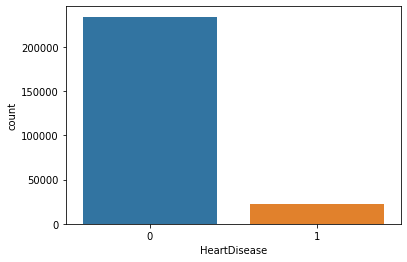

In [99]:
sns.countplot(x =train_y, data = train_y)

In [100]:
from imblearn.combine import SMOTETomek
from collections import Counter

In [101]:
train_y[train_y==0]

181129    0
193521    0
53471     0
148960    0
278743    0
         ..
34914     0
45192     0
55107     0
315645    0
310120    0
Name: HeartDisease, Length: 233846, dtype: int64

In [ ]:
counter=Counter(train_y)
print("Berfor ",counter)
os_us = SMOTETomek()
smt=SMOTETomek()
x_train_sm,y_train_sm=smt.fit_resample(train_x,train_y)
# X_train_res1, y_train_res1 = os_us.fit_sample(train_x, train_y)
counter=Counter(y_train_res1)
print("after",counter)

Berfor  Counter({0: 233846, 1: 21990})
